# Multiple Regression Model Using Facebook Data 
## By Colin Bayer
### For APRD6342

In [2]:
import pandas as pd

import statistics

import statsmodels.api as sm

import numpy as np

#import data
pony = pd.read_csv('Travel Pony Facebook.csv')

#Create new coloumn for cost per impressions 
pony['cost per impression'] =  pony['Amount Spent (USD)'] / pony['Impressions']

import arrow
import datetime
import dateutil.parser

In [10]:
wkdate = pd.to_datetime(pony['Start Date'], format = '%x')
dayowk = wkdate.dt.strftime('%A')


pony['Weekday'] = dayowk

SunCost = pony[pony['Weekday'] == 'Sunday']
np.mean(SunCost['cost per impression']) #0.003687913293955785

MCost = pony[pony['Weekday'] == 'Monday']
np.mean(MCost['cost per impression'])   #0.0029099769333124532

TCost = pony[pony['Weekday'] == 'Tuesday']
np.mean(TCost['cost per impression'])  #0.003040039601778186

WCost = pony[pony['Weekday'] == 'Wednesday']
np.mean(WCost['cost per impression'])  #0.002980820271366957

ThCost = pony[pony['Weekday'] == 'Thursday']
np.mean(ThCost['cost per impression']) #0.003398311623555868 

FCost = pony[pony['Weekday'] == 'Friday']
np.mean(FCost['cost per impression']) #0.004096890719487211 # most Expensive

SaCost = pony[pony['Weekday'] == 'Saturday']
np.mean(SaCost['cost per impression'])  #0.0026286969333697923 #Cheapest
    

daysoftheweek = dt.isoweekday()

NameError: name 'dt' is not defined

/Users/colin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/colin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/colin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/colin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/colin/anaconda3/lib/python3.6

                    Amount Spent (USD)     Reach
Amount Spent (USD)            1.000000  0.703124
Reach                         0.703124  1.000000
                    Amount Spent (USD)  Frequency
Amount Spent (USD)            1.000000   0.130201
Frequency                     0.130201   1.000000
                    Amount Spent (USD)  Unique Clicks
Amount Spent (USD)            1.000000       0.882993
Unique Clicks                 0.882993       1.000000
                    Amount Spent (USD)  Page Likes
Amount Spent (USD)            1.000000    0.757612
Page Likes                    0.757612    1.000000


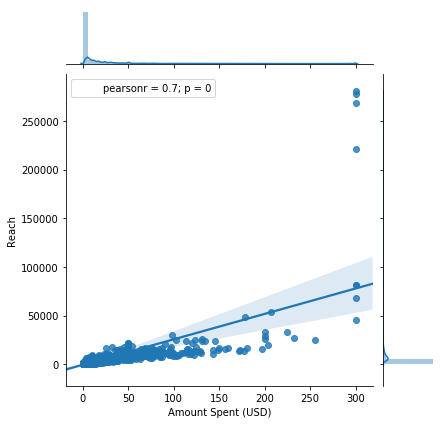

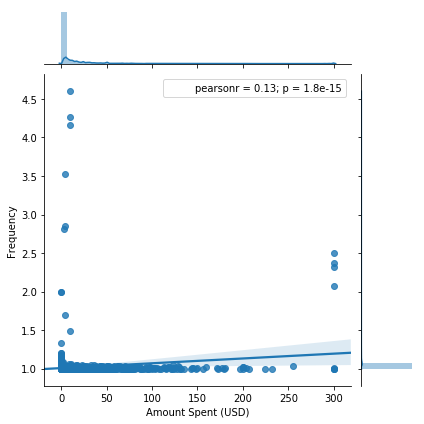

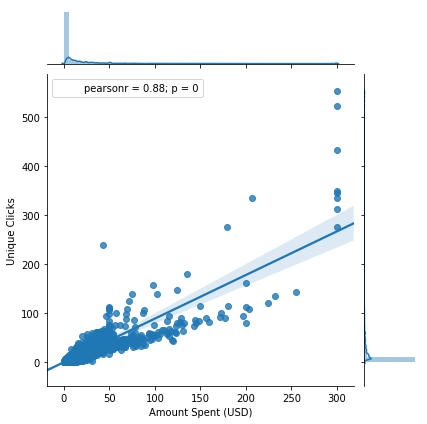

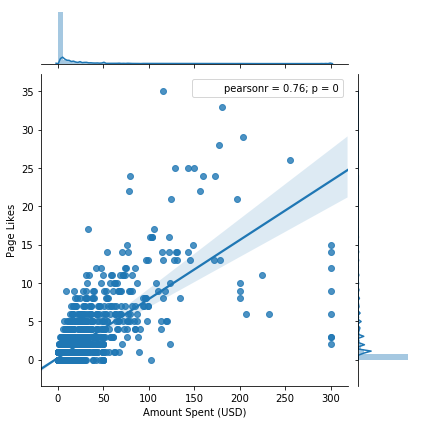

In [5]:
#Correlations 
import numpy as np
import seaborn as sns

sns.jointplot("Amount Spent (USD)", "Reach", data=pony, kind='reg'); # r = 0.7

sns.jointplot("Amount Spent (USD)", "Frequency", data=pony, kind='reg'); # r = 0.13

sns.jointplot("Amount Spent (USD)", "Unique Clicks", data=pony, kind='reg'); # r = 0.88

sns.jointplot("Amount Spent (USD)", "Page Likes", data=pony, kind='reg'); # r = 0.76


#All correlations at once 
print(pony[['Amount Spent (USD)', 'Reach']].corr()) # .703124
print(pony[['Amount Spent (USD)', 'Frequency']].corr()) # .130201
print(pony[['Amount Spent (USD)', 'Unique Clicks']].corr()) #.882993
print(pony[['Amount Spent (USD)', 'Page Likes']].corr())  # .757612
# Unique Clicks has the higher correlation which means there is a strong relationship with the amount of money spent on a camiagn to amount of Unique CLciks 


In [6]:
#Multiple regression 
#Change colomns 

X = pony[["Reach", "Frequency"]]
y = pony["Unique Clicks"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

#Frequency has a higher coeffient meaning that it each increase in frequency, the unique clicks will 
#more than if the reach increased in the same measurement as the inccreae in frequency


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Unique Clicks   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     2325.
Date:                Thu, 18 Oct 2018   Prob (F-statistic):               0.00
Time:                        14:48:48   Log-Likelihood:                -15973.
No. Observations:                3705   AIC:                         3.195e+04
Df Residuals:                    3703   BIC:                         3.196e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Reach          0.0019   3.12e-05     62.490      0.000       0.002       0.002
Frequency      3.6139      0.298     12.109      0.000       3.029       4.199
==============================================================================
Omnibus:                     5107.616   Durbin-Watson:                   0.803
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5128392.747
Skew:                           7.331   Prob(JB):                         0.00
Kurtosis:                     184.674   Cond. No.                     9.84e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""